In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from os import path
path ='/content/drive/MyDrive/CSV/housing.csv'
df = pd.read_csv(path)

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df_new = df[["longitude","latitude"]]
df_new.head

<bound method NDFrame.head of        longitude  latitude
0        -122.23     37.88
1        -122.22     37.86
2        -122.24     37.85
3        -122.25     37.85
4        -122.25     37.85
...          ...       ...
20635    -121.09     39.48
20636    -121.21     39.49
20637    -121.22     39.43
20638    -121.32     39.43
20639    -121.24     39.37

[20640 rows x 2 columns]>

In [11]:
df_new.describe()

,longitude,latitude
count,20640.000000,20640.000000
mean,-119.569704,35.631861
std,2.003532,2.135952
min,-124.350000,32.540000
25%,-121.800000,33.930000
50%,-118.490000,34.260000
75%,-118.010000,37.710000
max,-114.310000,41.950000


In [12]:
#mencari apakah ada data yang NULL
df_new.isnull().sum() 

longitude    0
latitude     0
dtype: int64

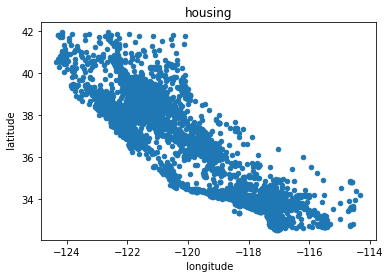

In [13]:
df.plot(kind='scatter', x= 'longitude', y='latitude')

plt.xlabel(' longitude')
plt.ylabel(' latitude')
plt.title ('housing')
plt.show()

In [14]:
df = df[["longitude","latitude"]]
df.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [15]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans =KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

In [16]:

inertia_list

[177008.98028089074,
 26623.85891120832,
 18287.010667831823,
 14263.133736151598,
 10340.11792653736,
 8022.052902465861,
 6814.0072680500425,
 6047.046358815071,
 5343.6631606479,
 4670.75040149569,
 4305.156591879174,
 3826.9471169574517,
 3512.9248873003617,
 3126.619211627597,
 2779.934632832919,
 2532.983470913594,
 2325.97690453426,
 2226.6806077678484,
 2075.524618334576,
 1979.039425632414]

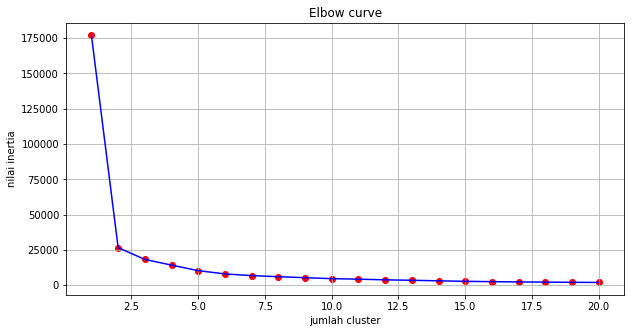

In [17]:
#plotting menggunakan elbow curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1,21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('jumlah cluster')
plt.ylabel('nilai inertia')
plt.title('Elbow curve')
plt.show()

In [18]:
#Step-1
k = 3 #Asumsikan kita akan mencari 3 sluster
np.random.seed(40)

#disini kita akan mendapat 3 point random centroid
random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(-124,-114), np.random.randint(32,42)])
print('Randomly selected points as random_centroids:',random_centroids)
 

Randomly selected points as random_centroids: [[-118, 39], [-119, 40], [-116, 34]]


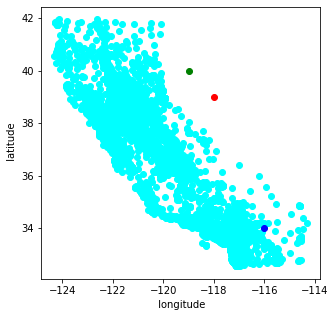

In [19]:
#PLOTTING RANDOM CENTROID TIAP SEGMEN
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel(' longitude')
plt.ylabel(' latitude')
plt.show() 

In [20]:


#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new

In [21]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,longitude,latitude,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,-122.23,37.88,4.375763,3.863586,7.339435,1,g
1,-122.22,37.86,4.371270,3.866264,7.320383,1,g
2,-122.24,37.85,4.393188,3.888457,7.332128,1,g
3,-122.25,37.85,4.402840,3.896794,7.340640,1,g
4,-122.25,37.85,4.402840,3.896794,7.340640,1,g


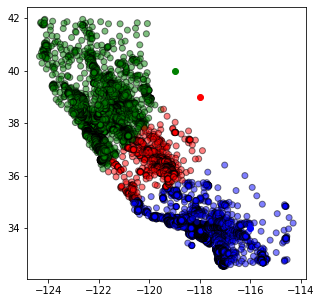

In [22]:
#Penempatan Cluster
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

In [23]:
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['CustomerAge'])
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['SpendingScore'])
    return parameter

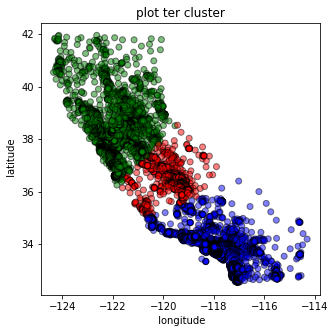

In [24]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')


plt.xlabel(' longitude')
plt.ylabel(' latitude')
plt.title ('plot ter cluster')
plt.show()